In [1]:
from common import *

In [2]:
df = pd.read_csv('../results/1611177920.csv')
df_raw = pd.read_csv('../results/1611177920_raw.csv')

# df = df[df.execution_time < 10.1]
# df_raw = df_raw[df_raw.execution_time < 10.1]

_f = "Frequency (GHz)"
_P = "Power (W)"
_t = "Number of Active Cores"
_c = "Core"
_vcore = "Core Voltage (V)"
_vdd = "Processor Voltage (V)"

#df_raw[_f] = df_raw.aperf / (df_raw.execution_time * 1e9)
df_raw[_f] = 2 * df_raw.aperf / df_raw.mperf
df[_P] = df.power
df_raw[_t] = df_raw.threads
df[_t] = df.threads
df_raw[_c] = df_raw.core

df_raw[_vcore] = 1.550 - 0.00625 * df_raw.core_voltage
df[_vdd] = df.main_voltage

df_raw_active = df_raw[df_raw.core < df_raw.threads]

ncores = df_raw.core.max() + 1
mcbf = 2.55 # Max Core Boost Frequency
acbf = 3.0 # All Core Boost Frequency

In [3]:
for core, dfg in df.groupby(_t):
    print(core, len(dfg))

1 10
2 10
3 10
4 10
5 10
6 10
7 10
8 10
9 10
10 10
11 10
12 10
13 10
14 10
15 10
16 10
17 10
18 10
19 10
20 10
21 10
22 10
23 10
24 10
25 10
26 10
27 10
28 10
29 10
30 10
31 10
32 10


In [ ]:
core_ticks = [1] + list(range(8,32+8,8))
core_colors = sns.color_palette("crest", n_colors=ncores)
colors = sns.color_palette("bright")
f_mean_color = colors[1]
vdd_color = colors[3]
power_color = colors[4]

matplotlib.rcParams['figure.figsize'] = [14, 7]
matplotlib.rcParams['legend.frameon'] = False
matplotlib.rcParams['legend.labelspacing'] = 0.2

fig, (ax_frequency, ax_power, ax_voltage) = plt.subplots(3, 1, sharex=True)

# sns.lineplot(
#     data=df_raw,
#     x=_t,
#     y=_f,
#     hue=_c,
#     estimator=np.median,
#     ci=None,
#     ax=ax_frequency,
#     marker=".",
#     legend="brief",
#     # markers=["+"] * 32,
# )

from matplotlib.lines import Line2D

ax_frequency.plot([0, ncores*2], [mcbf, mcbf], marker=False, ls=":", color="gray")
ax_frequency.plot([0, ncores*2], [acbf, acbf], marker=False, ls="--", color="gray")

for core, dfg in df_raw_active.groupby(_c):
    sns.lineplot(
        data=dfg,
        x=_t,
        y=_f,
        marker=".",
        estimator=np.mean,
        ci=None,
        color=core_colors[core],
        ax=ax_frequency,
        legend=True,
    )

lkwargs = {
    "markeredgecolor": "white",
}
ax_frequency.legend(handles=[
    Line2D([0], [0], color=f_mean_color, lw=1, label="Mean Active", marker="o", **lkwargs),
    Line2D([0], [0], color=core_colors[0], lw=1, label="Core 0", marker=".", **lkwargs),
    # Line2D([0], [0], color=core_colors[16], lw=1, label="Core 16", marker=".", **lkwargs),
    Line2D([0], [0], color=core_colors[31], lw=1, label="Core 31", marker=".", **lkwargs),
    Line2D([0], [0], color="gray", lw=1, ls="--", label="Max Core Boost", marker="", **lkwargs),
    Line2D([0], [0], color="gray", lw=1, ls=":", label="All Core Boost", marker="", **lkwargs),
], loc="upper right")

sns.lineplot(
    data=df_raw_active.groupby([_t, _c]).median().groupby(_t).mean(),
    x="threads",
    y=_f,
    marker="o",
    color=f_mean_color,
    ax=ax_frequency,
)

sns.lineplot(
    data=df,
    x=_t,
    y=_P,
    ax=ax_power,
    marker="o",
    estimator=np.mean,
    ci="sd",
    color=power_color,
    err_style="band",
)


for core, dfg in df_raw_active.groupby(_c):
    sns.lineplot(
        data=dfg,
        x=_t,
        y=_vcore,
        marker=".",
        estimator=np.mean,
        ci=None,
        color=core_colors[core],
        ax=ax_voltage,
    )

sns.lineplot(
    data=df,
    x=_t,
    y=_vdd,
    ax=ax_voltage,
    marker="o",
    estimator=np.mean,
    ci="sd",
    color=vdd_color,
)

ax_voltage.legend(handles=[
    Line2D([0], [0], color=vdd_color, lw=1, label="VDDCPU", marker="o", **lkwargs),
    Line2D([0], [0], color=core_colors[0], lw=1, label="Core 0", marker=".", **lkwargs),
    # Line2D([0], [0], color=core_colors[16], lw=1, label="Core 16", marker=".", **lkwargs),
    Line2D([0], [0], color=core_colors[31], lw=1, label="Core 31", marker=".", **lkwargs),
])

ax_voltage.set_xlim(0,33)
ax_voltage.set_xticks(core_ticks)
ax_voltage.set_ylabel("Voltage (V)")
savefig("reference")

saving and cropping  ../paper/fig/reference-1c.pdf


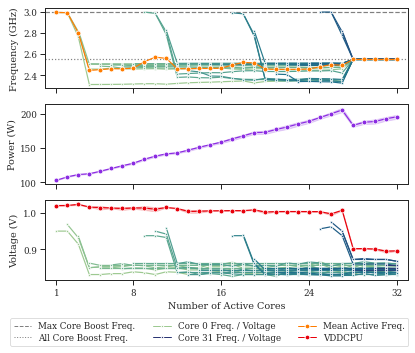

In [28]:
core_ticks = [1] + list(range(8,32+8,8))
core_colors = sns.color_palette("crest", n_colors=ncores)
colors = sns.color_palette("bright")
f_mean_color = colors[1]
vdd_color = colors[3]
power_color = colors[4]

matplotlib.rcParams['figure.figsize'] = [6.5, 5]
matplotlib.rcParams['legend.frameon'] = True
matplotlib.rcParams['legend.labelspacing'] = 0.3

fig, (ax_frequency, ax_power, ax_voltage) = plt.subplots(3, 1, sharex=True)

# sns.lineplot(
#     data=df_raw,
#     x=_t,
#     y=_f,
#     hue=_c,
#     estimator=np.median,
#     ci=None,
#     ax=ax_frequency,
#     marker=".",
#     legend="brief",
#     # markers=["+"] * 32,
# )

from matplotlib.lines import Line2D

ax_frequency.plot([0, ncores*2], [mcbf, mcbf], marker=False, ls=":", color="gray")
ax_frequency.plot([0, ncores*2], [acbf, acbf], marker=False, ls="--", color="gray")

for core, dfg in df_raw_active.groupby(_c):
    sns.lineplot(
        data=dfg,
        x=_t,
        y=_f,
        marker=".",
        estimator=np.mean,
        ci=None,
        color=core_colors[core],
        ax=ax_frequency,
        legend=True,
    )

sns.lineplot(
    data=df_raw_active.groupby([_t, _c]).median().groupby(_t).mean(),
    x="threads",
    y=_f,
    marker="o",
    color=f_mean_color,
    ax=ax_frequency,
)

sns.lineplot(
    data=df,
    x=_t,
    y=_P,
    ax=ax_power,
    marker="o",
    estimator=np.mean,
    ci="sd",
    color=power_color,
    err_style="band",
)


for core, dfg in df_raw_active.groupby(_c):
    sns.lineplot(
        data=dfg,
        x=_t,
        y=_vcore,
        marker=".",
        estimator=np.mean,
        ci=None,
        color=core_colors[core],
        ax=ax_voltage,
    )

sns.lineplot(
    data=df,
    x=_t,
    y=_vdd,
    ax=ax_voltage,
    marker="o",
    estimator=np.mean,
    ci="sd",
    color=vdd_color,
)


lkwargs = {
    "markeredgecolor": "white",
}
fig.legend(handles=[
    Line2D([0], [0], color="gray", lw=1, ls="--", label="Max Core Boost Freq.", marker="", **lkwargs),
    Line2D([0], [0], color="gray", lw=1, ls=":", label="All Core Boost Freq.", marker="", **lkwargs),
    Line2D([0], [0], color=core_colors[0], lw=1, label="Core 0 Freq. / Voltage", marker=".", **lkwargs),
    # Line2D([0], [0], color=core_colors[16], lw=1, label="Core 16", marker=".", **lkwargs),
    Line2D([0], [0], color=core_colors[31], lw=1, label="Core 31 Freq. / Voltage", marker=".", **lkwargs),
    Line2D([0], [0], color=f_mean_color, lw=1, label="Mean Active Freq.", marker="o", **lkwargs),
    Line2D([0], [0], color=vdd_color, lw=1, label="VDDCPU", marker="o", **lkwargs),
], ncol=3, loc="lower center", bbox_to_anchor=(0., -0.07, 0.95, -0.07))

ax_voltage.set_xlim(0,33)
ax_voltage.set_xticks(core_ticks)
ax_voltage.set_ylabel("Voltage (V)")
savefig("reference-1c")

<AxesSubplot:xlabel='Number of Active Cores', ylabel='aperf'>

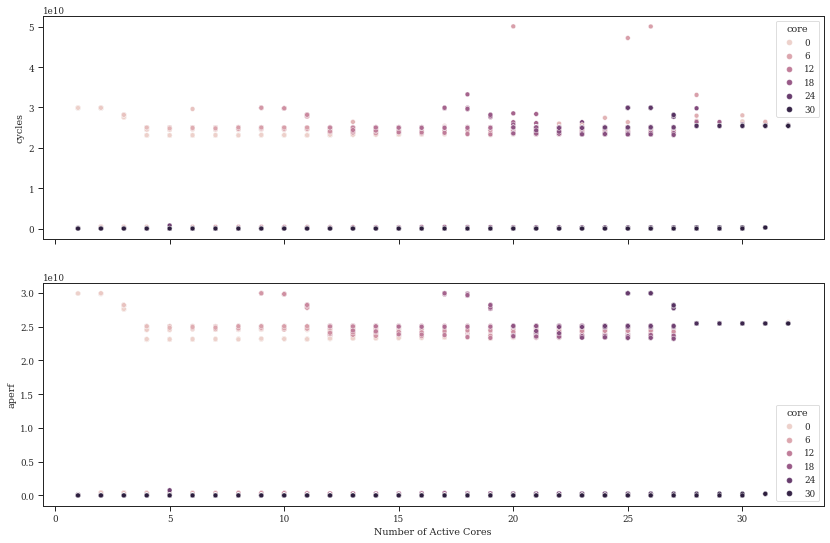

In [38]:
fig, axs = plt.subplots(2, 1, sharex=True)
sns.scatterplot(
    data=df_raw,
    x=_t,
    y="cycles",
    hue="core",
    ax=axs[0],
)
sns.scatterplot(
    data=df_raw,
    x=_t,
    y="aperf",
    hue="core",
    ax=axs[1],
)